# Black-Scholes-Merton Model for Vanilla Option Pricing

This notebook demonstrates the pricing of European call and put options using the Black-Scholes-Merton (BSM) model. We implement the analytical pricing formulas and explore the effect of varying parameters such as volatility and time to maturity.

This forms the foundation for comparing with Monte Carlo, PDE, and binomial pricing methods used later in this project.

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Black-Scholes Formula

The function `black_scholes_price` computes the theoretical price of a European call or put option. It uses risk-neutral valuation under lognormal stock price dynamics.

In [6]:
# Black-Scholes formula implementation
def black_scholes_price(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))

    if option_type.lower() == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type.lower() == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

In [7]:
S = 100  # Current stock price
K = 100  # Strike price
T = 1  # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

price_call = black_scholes_price(S, K, T, r, sigma, option_type="call")
price_put = black_scholes_price(S, K, T, r, sigma, option_type="put")

print(f"Call Price: {price_call:.4f}")
print(f"Put Price:  {price_put:.4f}")

Call Price: 10.4506
Put Price:  5.5735


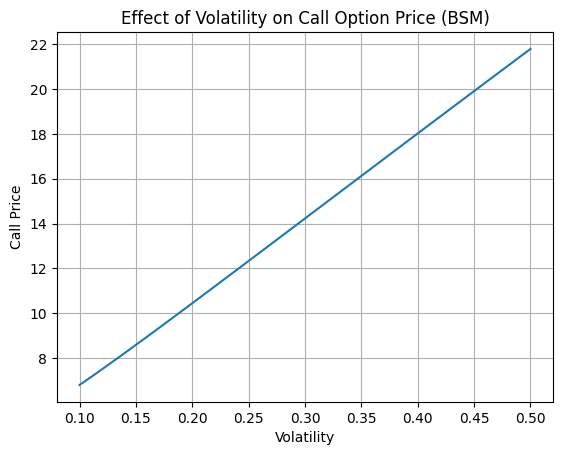

In [8]:
vols = np.linspace(0.1, 0.5, 50)
call_prices = [black_scholes_price(S, K, T, r, v, "call") for v in vols]

plt.plot(vols, call_prices)
plt.xlabel("Volatility")
plt.ylabel("Call Price")
plt.title("Effect of Volatility on Call Option Price (BSM)")
plt.grid(True)
plt.show()

### Summary

- The Black-Scholes-Merton model provides a closed-form solution for pricing European options.
- As expected, option prices increase with volatility and time to maturity.
- This notebook sets the stage for comparing analytical results with numerical methods (MC, PDE, Binomial).